In [172]:
# For using custom module.
import sys
sys.path.append('../custom_library')

In [173]:
import spacy
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import numpy as np
import pandas as pd 
import connect_to_db as cn
from gensim import corpora
import gensim
import csv
import parmap
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import seaborn as sns

In [174]:
sql = "select community_id_fastgreedy_is, count(*) from nodes_until_november group by community_id_fastgreedy_is having count(*) > 2 order by count(*) asc;"
result_df = cn.select_query_result_to_df(sql)
communities = list(np.array(result_df['community_id_fastgreedy_is'].values.tolist()))

### with common_texts (not used)

In [175]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)
# model.save("word2vec.model")
# model = Word2Vec.load("word2vec.model")
model.train(topics, total_examples=1, epochs=1)

(0, 10)

In [176]:
from os import listdir

def find_csv_filenames(path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

filenames = find_csv_filenames("../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne")

communities = []

for name in filenames:
    communities.append(name.split('_')[1])

In [177]:
# print(filenames)
print(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/{filenames[0]}')

../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/community_6849_topics_10_words.csv


In [178]:
import math

mean_vector_list = []
topics_num = []

for i in range(len(communities)):
    with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/{filenames[i]}', newline='') as f:
        reader = csv.reader(f)
        topics = list(reader)
        topics_num.append(len(topics))
        model = Word2Vec(topics, min_count=1)
        model.train(topics, total_examples=1, epochs=1)
    
        word_vectors = model.wv
        # print(len(word_vectors))

        # print(word_vectors[0].tolist())

        word_vector_list = []
        mean_vector = []
    
        for i in range(len(word_vectors)):
            word_vector_list.append(word_vectors[i].tolist())
        
        for element in zip(*word_vector_list):
            mean_vector.append(float(np.mean(element)))
        
        mean_vector_list.append(mean_vector)

In [179]:
print(mean_vector_list[0][0])

-0.0021087670866108965


In [181]:
# convert list to np.array
mean_vector_array = np.array(mean_vector_list)
print(mean_vector_array)

[[-2.10876709e-03  1.34370804e-03  3.93717566e-04 ... -3.81419776e-03
   4.06157087e-04 -5.03940304e-04]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]
 ...
 [-2.93874268e-03  2.18808653e-03  8.12756481e-04 ... -2.59948198e-03
   1.01563270e-03 -1.06801566e-03]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]]


## t-SNE

In [182]:
from sklearn.manifold import TSNE

data = mean_vector_array
print(type(data))
print(data)
# n_components = 2

# model = TSNE(n_components=n_components)
# print(model.fit_transform(data))

plt.rc('axes', unicode_minus=False)
tsne = TSNE(random_state = 42)
data_tsne = tsne.fit_transform(data)
print(data_tsne)

<class 'numpy.ndarray'>
[[-2.10876709e-03  1.34370804e-03  3.93717566e-04 ... -3.81419776e-03
   4.06157087e-04 -5.03940304e-04]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]
 ...
 [-2.93874268e-03  2.18808653e-03  8.12756481e-04 ... -2.59948198e-03
   1.01563270e-03 -1.06801566e-03]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]]
[[-29.778774  -25.000711 ]
 [  3.606549    6.295797 ]
 [  1.2227609   8.144201 ]
 ...
 [ 43.496006  -16.084393 ]
 [ -1.7983787  12.323054 ]
 [ -2.031797   16.36044  ]]


In [ ]:
plt.figure(figsize=(10,10))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

print(data_tsne)

for i in range(len(data)):
    plt.text(data_tsne[i,0], data_tsne[i,1], 'o',
            fontdict = {'weight':'bold','size':9})

In [188]:
print(len(data))
print(len(topics_num))

print(topics_num)

8228
8228
[1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,

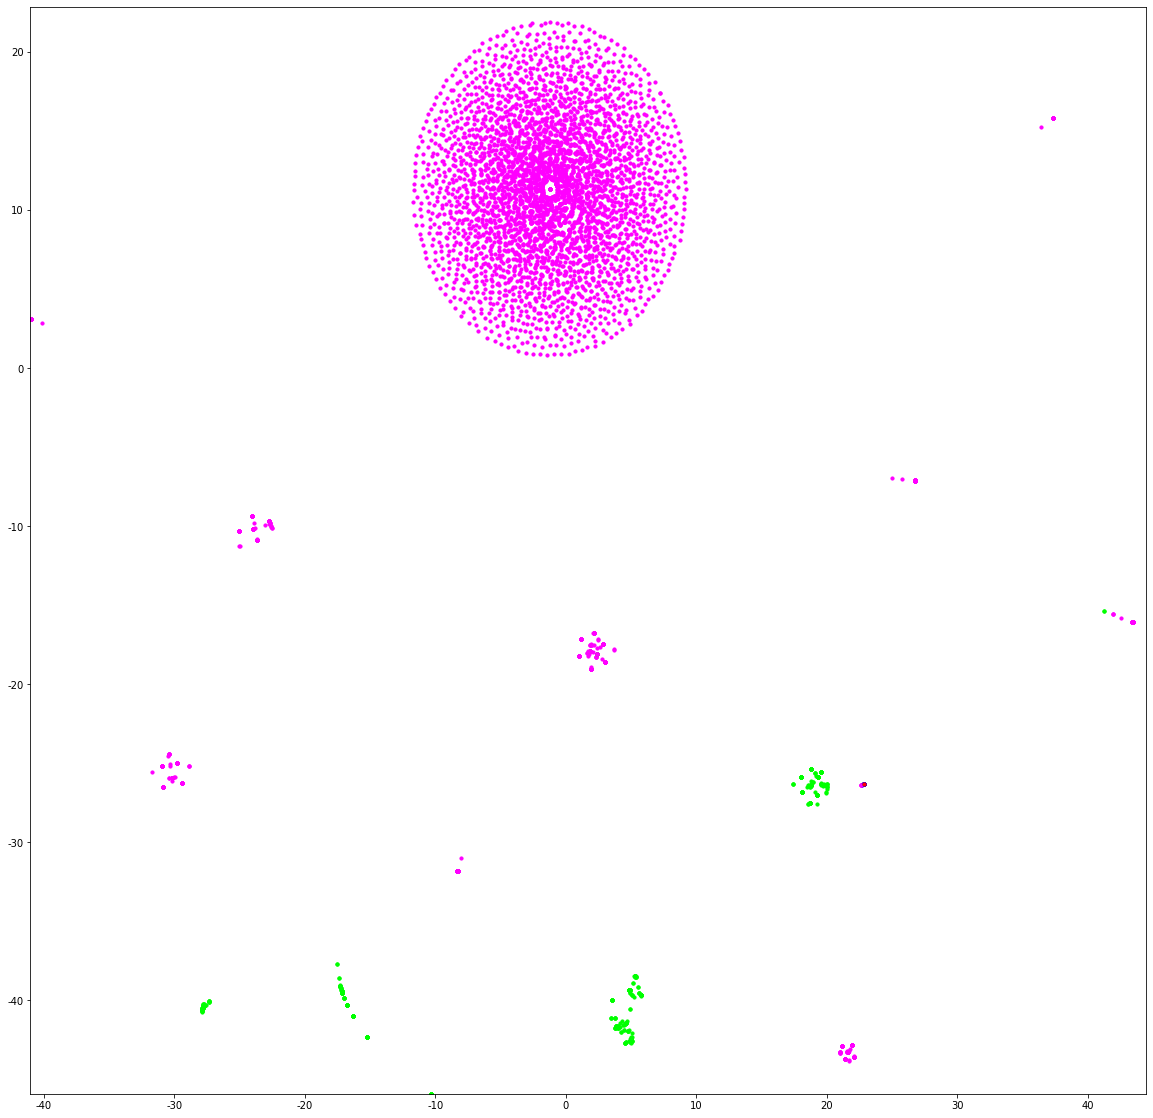

In [191]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)
for i in range(len(data)):
    if topics_num[i] == 5:
        color = '#ff0000'
    elif topics_num[i] == 4:
        color = '#0000ff'
    elif topics_num[i] == 3:
        color = '#00ff00'
    else:
        color = '#ff00ff'
        
    size = 10
    plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()